# Imports

In [1]:
# Python 2 & 3 Compatibility
from __future__ import print_function, division
%autosave 120

import pandas as pd
import numpy as np
import seaborn as sns
import patsy
import random
import statsmodels.api as sm
import statsmodels.formula.api as smf
from sklearn import preprocessing
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.cross_validation import train_test_split
from sklearn.cross_validation import KFold
from sklearn.cross_validation import cross_val_score
from sklearn.cross_validation import cross_val_predict
import pickle
import scipy.stats as stats
%matplotlib inline

Autosaving every 120 seconds


# Merge 'Amazon' df & 'IMDB' df

In [5]:
imdb = pickle.load(open("cleaner_imdb.p", "rb"))

In [6]:
amazon = pickle.load(open("cleaner_amazon.p", "rb"))

In [11]:
data = amazon.merge(imdb, on='amazonid', how='left')

In [48]:
data = data.dropna(axis=0, how='any', subset= [
    'box_office', 'stars'], inplace=False)

# Clean 'Amazon + IMDB' df

In [57]:
df = data[['stars', 'reviews', 'bs_rank', 'years', 'big_publishing', 'PRH_dummy',
       'H_Books_dummy', 'SS_dummy', 'HC_dummy', 'Mac_dummy', 'release',
       'box_office']].copy()

In [69]:
df['stars'] = df['stars'].astype(np.float)
df['reviews'] = df['reviews'].astype(np.float)
df['bs_rank'] = df['bs_rank'].astype(np.float)
df['years'] = df['years'].astype(np.float)
df['release'] = df['release'].astype(np.float)

In [72]:
# years is book published year. relese is film release year.
df['wait'] = df.release - df.years

In [75]:
cols = df.columns.tolist()
cols.insert(0, cols.pop(cols.index('box_office')))
cols

['box_office',
 'stars',
 'reviews',
 'bs_rank',
 'years',
 'big_publishing',
 'PRH_dummy',
 'H_Books_dummy',
 'SS_dummy',
 'HC_dummy',
 'Mac_dummy',
 'release',
 'wait']

In [76]:
df = df.reindex(columns= cols)

In [82]:
df.groupby('box_office', as_index=False).max()

,box_office,stars,reviews,bs_rank,years,big_publishing,PRH_dummy,H_Books_dummy,SS_dummy,HC_dummy,Mac_dummy,release,wait
0,3.478000e+03,3.2,21.0,74042.0,1998.0,0,0,0,0,0,0,2008.0,10.0
1,3.838000e+03,4.1,23.0,90575.0,2002.0,0,0,0,0,0,0,2011.0,9.0
2,6.911000e+03,4.6,9.0,18742.0,2002.0,0,0,0,0,0,0,2010.0,8.0
3,1.002000e+04,3.6,46.0,14586.0,1996.0,1,0,0,0,0,1,2013.0,17.0
4,1.759500e+04,3.7,39.0,1095.0,2000.0,0,0,0,0,0,0,2009.0,9.0
5,2.969000e+04,4.2,27.0,18468.0,2001.0,0,0,0,0,0,0,2005.0,4.0
6,3.062900e+04,4.1,167.0,20144.0,1996.0,1,0,1,0,0,0,2006.0,10.0
7,3.182800e+04,4.0,47.0,4405.0,1979.0,1,1,0,0,0,0,1985.0,6.0
8,4.311600e+04,3.4,63.0,6640.0,1994.0,0,0,0,0,0,0,2014.0,20.0
9,4.315300e+04,4.1,11.0,3509.0,2002.0,1,0,0,1,0,0,1967.0,-35.0


In [78]:
pickle.dump(df, open("merged_final.p", "wb"))

# Log transform Y 'Box_office'

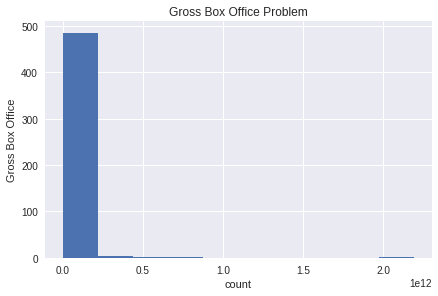

In [86]:
df['box_office'].hist()
plt.tight_layout()
plt.ylabel('Gross Box Office')
plt.xlabel('count')
plt.title('Gross Box Office Problem')
plt.show()

In [87]:
df['box_office_log'] = df['box_office'].apply(np.log)

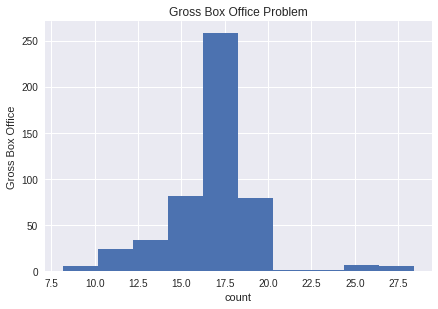

In [88]:
df['box_office_log'].hist()
plt.tight_layout()
plt.ylabel('Gross Box Office')
plt.xlabel('count')
plt.title('Log Transformed Gross Box Office')
plt.show()

# New Df: w/o Mrs. Doubtfire outlier

In [95]:
data.sort_values(by='box_office', ascending=True).tail(3)

,amazonid,header,title_author,stars,reviews,bs_rank,language,publisher,years,big_publishing,...,Mac_dummy,imdbid,gross,amazon,metascore,ranks,title,links,release,box_office
280,0670528315,Ordinary People: Judith Guest: 9780670528318: ...,Ordinary People: Judith Guest,4.2,250,44000,Language: English,Viking,1976,0,...,0,tt0081283,"$54,766,923 (USA) ( 1981)","<a href=""http://www.amazon.com/exec/obidos/ASI...",85.0,575.,Ordinary People,/title/tt0081283/?ref_=adv_li_tt,1980,5.476692e+11
43,1559724579,The 50 Greatest Jewish Movies: A Critic's Rank...,The 50 Greatest Jewish Movies: A Critic's Rank...,4.0,1,549,Language: English,Citadel,1998,0,...,0,tt0052618,"$74,700,000 (USA) ( 1959)","<a href=""http://www.amazon.com/exec/obidos/ASI...",90.0,62.,Ben-Hur,/title/tt0052618/?ref_=adv_li_tt,1959,7.470000e+11
81,0316283134,Alias Madame Doubtfire: Anne Fine: 97803162831...,Alias Madame Doubtfire: Anne Fine,4.0,6,52438,Language: English,Hachette Books,1991,1,...,0,tt0107614,"$219,195,051 (USA) ( 1994)","<a href=""http://www.amazon.com/exec/obidos/ASI...",53.0,133.,Mrs. Doubtfire,/title/tt0107614/?ref_=adv_li_tt,1993,2.191951e+12


In [226]:
df_woo = df.sort_values(by='box_office', ascending=True)[0:-1]

In [229]:
cols = df_woo.columns.tolist()
cols.insert(0, cols.pop(cols.index('box_office_log')))
cols

['box_office_log',
 'box_office',
 'stars',
 'reviews',
 'bs_rank',
 'years',
 'big_publishing',
 'PRH_dummy',
 'H_Books_dummy',
 'SS_dummy',
 'HC_dummy',
 'Mac_dummy',
 'release',
 'wait']

In [230]:
df_woo = df_woo.reindex(columns= cols)

In [235]:
# shuffle df_woo. cross_val_score doesnt suffle.
df_woo = df_woo.sample(frac=1)

In [237]:
# pickle.dump(df_woo, open("df_woo.p", "wb"))

In [3]:
# df_woo = pickle.load(open("df_woo.p", "rb"))

# Correlation & Multicolinearity
## with outlier

In [79]:
df.corr()
# There are obvious correlations between 'wait', film release & book publication year. 
# As well as correlations between the dummy variables for 'big publishing' 
# and the individual publishing companies.
# but there is very little correlation between any of the variables and box office gross.

,box_office,stars,reviews,bs_rank,years,big_publishing,PRH_dummy,H_Books_dummy,SS_dummy,HC_dummy,Mac_dummy,release,wait
box_office,1.000000,-0.026577,-0.025431,-0.000353,-0.098416,0.051883,-0.025862,0.174978,-0.000008,-0.014017,-0.022641,-0.167724,-0.070421
stars,-0.026577,1.000000,0.224840,-0.122464,0.090000,-0.016669,-0.077196,0.077955,-0.019361,0.024350,-0.002596,0.043453,-0.041834
reviews,-0.025431,0.224840,1.000000,-0.066895,0.286088,-0.089500,-0.000279,-0.028443,-0.044401,-0.065160,-0.045642,0.261938,-0.013330
bs_rank,-0.000353,-0.122464,-0.066895,1.000000,-0.105909,0.037843,0.146792,-0.042785,-0.020599,-0.051324,-0.028674,0.016240,0.114339
years,-0.098416,0.090000,0.286088,-0.105909,1.000000,-0.018045,-0.081763,0.032357,0.035520,0.023768,-0.007793,0.445195,-0.501179
big_publishing,0.051883,-0.016669,-0.089500,0.037843,-0.018045,1.000000,0.523641,0.325698,0.325698,0.309051,0.297564,0.082397,0.096435
PRH_dummy,-0.025862,-0.077196,-0.000279,0.146792,-0.081763,0.523641,1.000000,-0.111601,-0.111601,-0.105897,-0.101960,0.063014,0.137051
H_Books_dummy,0.174978,0.077955,-0.028443,-0.042785,0.032357,0.325698,-0.111601,1.000000,-0.069414,-0.065866,-0.063418,0.044722,0.013082
SS_dummy,-0.000008,-0.019361,-0.044401,-0.020599,0.035520,0.325698,-0.111601,-0.069414,1.000000,-0.065866,-0.063418,-0.004057,-0.037004
HC_dummy,-0.014017,0.024350,-0.065160,-0.051324,0.023768,0.309051,-0.105897,-0.065866,-0.065866,1.000000,-0.060177,-0.015820,-0.037426


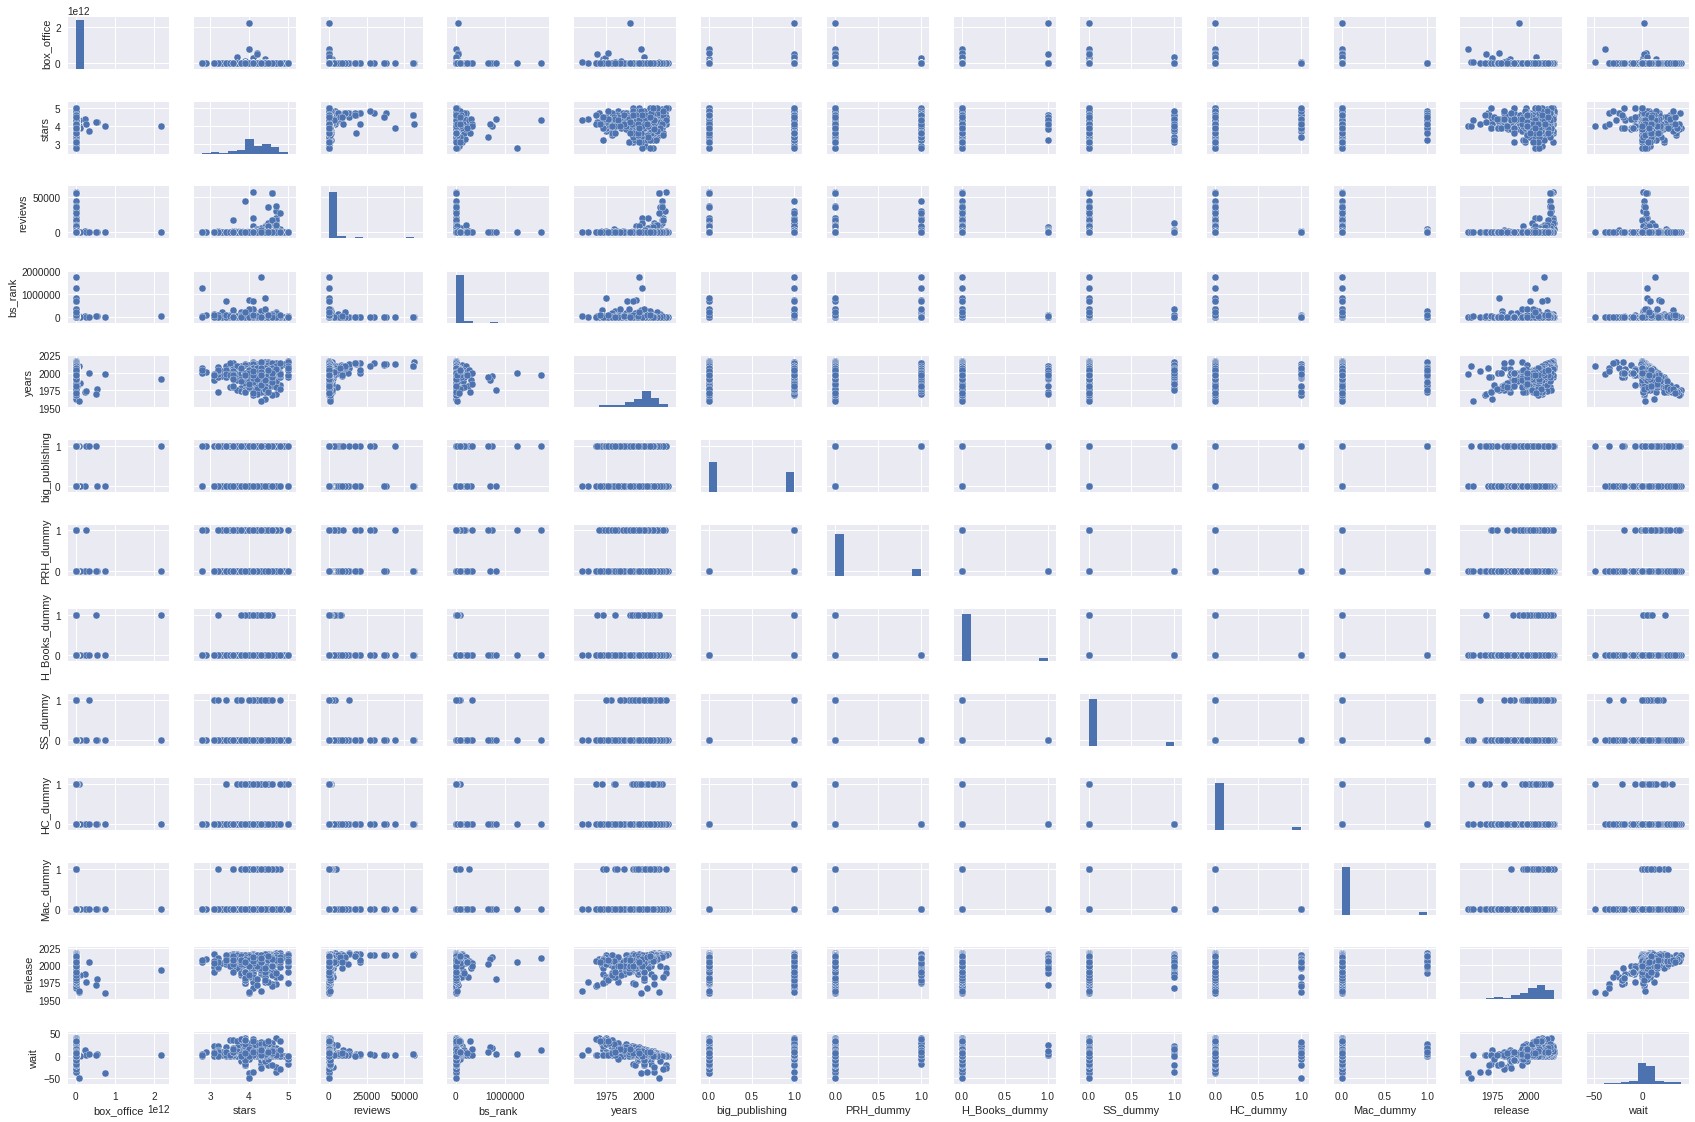

In [80]:
sns.pairplot(df, size = 1.2, aspect=1.5)

## Correlation & Multicolinearity w/o Outlier

In [3]:
# df_woo = pickle.load(open("df_woo.p", "rb"))

In [238]:
df_woo.corr()
# correlation w/o outlier is a much better with log tranformed y 'box_office_log'

,box_office_log,box_office,stars,reviews,bs_rank,years,big_publishing,PRH_dummy,H_Books_dummy,SS_dummy,HC_dummy,Mac_dummy,release,wait
box_office_log,1.000000,0.450811,0.194351,0.207622,-0.099085,-0.003355,0.063109,-0.026710,0.062893,0.066888,0.089789,-0.054801,-0.162063,-0.153387
box_office,0.450811,1.000000,-0.021571,-0.028956,-0.013066,-0.154735,0.005917,-0.019096,0.052014,0.022072,-0.008636,-0.027624,-0.283186,-0.129413
stars,0.194351,-0.021571,1.000000,0.224652,-0.122365,0.089521,-0.015661,-0.077579,0.082362,-0.019587,0.024146,-0.002798,0.042781,-0.042037
reviews,0.207622,-0.028956,0.224652,1.000000,-0.066814,0.285850,-0.088905,-0.000533,-0.026560,-0.044567,-0.065319,-0.045793,0.261644,-0.013470
bs_rank,-0.099085,-0.013066,-0.122365,-0.066814,1.000000,-0.105765,0.037533,0.146948,-0.044577,-0.020522,-0.051254,-0.028605,0.016506,0.114416
years,-0.003355,-0.154735,0.089521,0.285850,-0.105765,1.000000,-0.016485,-0.082357,0.037817,0.035197,0.023458,-0.008107,0.444609,-0.501707
big_publishing,0.063109,0.005917,-0.015661,-0.088905,0.037533,-0.016485,1.000000,0.525618,0.321394,0.326891,0.310181,0.298650,0.084722,0.097169
PRH_dummy,-0.026710,-0.019096,-0.077579,-0.000533,0.146948,-0.082357,0.525618,1.000000,-0.109975,-0.111856,-0.106138,-0.102192,0.062340,0.136886
H_Books_dummy,0.062893,0.052014,0.082362,-0.026560,-0.044577,0.037817,0.321394,-0.109975,1.000000,-0.068395,-0.064899,-0.062486,0.052074,0.015079
SS_dummy,0.066888,0.022072,-0.019587,-0.044567,-0.020522,0.035197,0.326891,-0.111856,-0.068395,1.000000,-0.066009,-0.063555,-0.004515,-0.037132


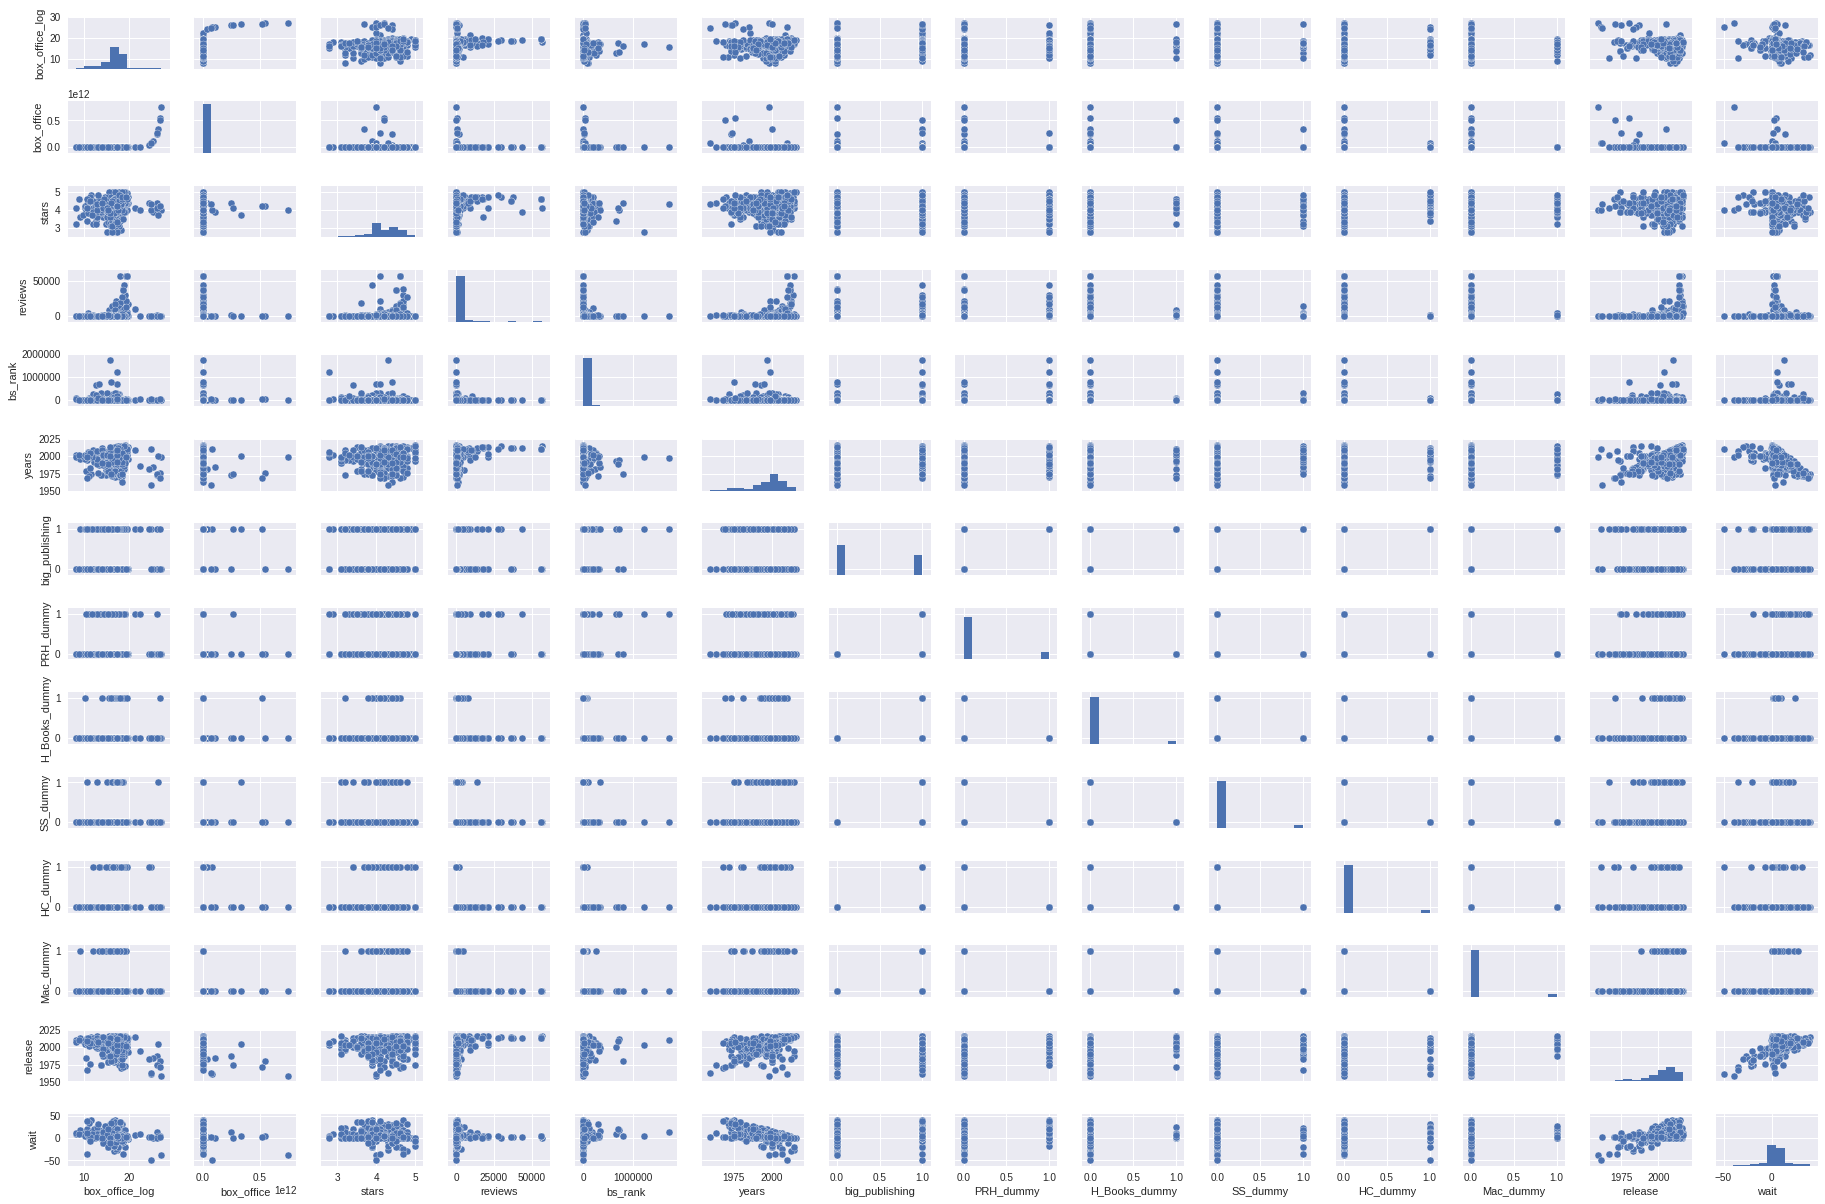

In [239]:
sns.pairplot(df_woo, size = 1.2, aspect=1.5)

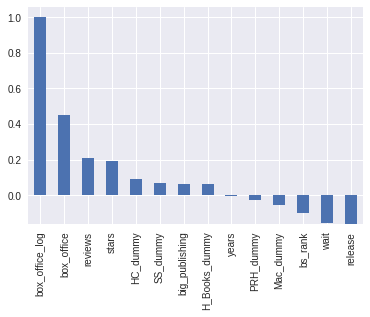

In [240]:
df_woo.corr()['box_office_log'].sort_values(ascending=False).plot(kind='bar')

# Linear Regression 
## Ordinary Least Squares 
### w/o outlier

In [271]:
#without outliers
y, X = patsy.dmatrices(
    'box_office_log ~ stars + reviews + years + big_publishing + wait', data=df_woo, return_type="dataframe")
model = sm.OLS(y, X)
fit = model.fit()
fit.summary()
# features removed: + bs_rank  + PRH_dummy + H_Books_dummy + SS_dummy + HC_dummy + Mac_dummy

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         box_office_log   R-squared:                       0.127
Model:                            OLS   Adj. R-squared:                  0.118
Method:                 Least Squares   F-statistic:                     14.17
Date:                Thu, 27 Apr 2017   Prob (F-statistic):           5.87e-13
Time:                        19:01:00   Log-Likelihood:                -1118.7
No. Observations:                 492   AIC:                             2249.
Df Residuals:                     486   BIC:                             2275.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept        116.9902     25.064      4.668      0.000      67.743     166.237
stars              0.9289      0.269      3.447      0.001       0.399       1.458
reviews         6.971e-05   1.33e-05      5.250      0.000    4.36e-05    9.58e-05
years             -0.0522      0.013     -4.162      0.000      -0.077      -0.028
big_publishing     0.5609      0.221      2.542      0.011       0.127       0.994
wait              -0.0591      0.011     -5.257      0.000      -0.081      -0.037
==============================================================================
Omnibus:                       42.178   Durbin-Watson:                   2.114
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              203.521
Skew:                          -0.078   Prob(JB):                     6.40e-45
Kurtosis:                       6.147   Cond. No.                     2.14e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.14e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### OLS with outlier

In [272]:
#with outlier
y, X = patsy.dmatrices(
    'box_office_log ~ stars + reviews + years + big_publishing + wait', data=df, return_type="dataframe")
model = sm.OLS(y, X)
fit = model.fit()
fit.summary()
# features removed: + bs_rank + PRH_dummy + H_Books_dummy + SS_dummy + HC_dummy + Mac_dummy

# R sqaured is worse with the outlier added.
# Giving up the dataframe with the outlier.

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         box_office_log   R-squared:                       0.126
Model:                            OLS   Adj. R-squared:                  0.117
Method:                 Least Squares   F-statistic:                     14.00
Date:                Thu, 27 Apr 2017   Prob (F-statistic):           8.37e-13
Time:                        19:01:14   Log-Likelihood:                -1131.3
No. Observations:                 493   AIC:                             2275.
Df Residuals:                     487   BIC:                             2300.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept        121.8254     25.575      4.764      0.000      71.575     172.076
stars              0.9080      0.275      3.300      0.001       0.367       1.449
reviews         7.025e-05   1.36e-05      5.180      0.000    4.36e-05    9.69e-05
years             -0.0545      0.013     -4.264      0.000      -0.080      -0.029
big_publishing     0.6216      0.225      2.763      0.006       0.180       1.064
wait              -0.0609      0.011     -5.313      0.000      -0.083      -0.038
==============================================================================
Omnibus:                       46.450   Durbin-Watson:                   1.680
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              250.806
Skew:                           0.081   Prob(JB):                     3.45e-55
Kurtosis:                       6.490   Cond. No.                     2.14e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.14e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

 # Cross Validation: Linear Regression
 ## Cross_val_score

In [4]:
y=df_woo['box_office_log']
X=df_woo.drop(['years', 'box_office_log','box_office', 'bs_rank', 'PRH_dummy', 
               'H_Books_dummy', 'SS_dummy', 'HC_dummy', 'Mac_dummy'],1)
norm_X = preprocessing.normalize(X)

In [275]:
print(norm_X.shape)
cv_score = cross_val_score(LinearRegression(), norm_X, y, cv=6, scoring='r2')
print(cv_score.mean())
# how did the limitations of my data make my model unpredicatble.

(492, 5)
0.0719559098628


In [276]:
cv_predict = cross_val_predict(LinearRegression(), norm_X, y, cv=6)
cv_predict

array([ 18.2440754 ,  16.01088935,  16.50141484,  16.93063219,
        16.7177589 ,  16.26485884,  17.84986548,  16.64214529,
        17.32936157,  17.41085265,  16.50094655,  15.88772586,
        16.78753175,  17.2230419 ,  18.16767868,  16.15339258,
        18.26870902,  16.22151308,  17.10538893,  16.58496769,
        17.37360985,  16.25934477,  16.43536003,  15.4690956 ,
        15.91869771,  16.98527499,  16.07269185,  16.96454943,
        14.87344465,  17.41085265,  18.27423372,  17.04091634,
        16.73208501,  17.64102407,  16.49055099,  17.10361443,
        16.5065595 ,  17.61266835,  16.27558508,  18.27276041,
        16.63784804,  17.23435656,  16.67877082,  17.75456231,
        15.90768742,  16.97782848,  16.78813604,  16.5853339 ,
        16.32276349,  18.27423372,  16.2007812 ,  16.15234903,
        16.2991789 ,  16.02208264,  16.51559793,  16.09514793,
        16.49505193,  16.01585879,  18.22174273,  17.27392745,
        15.76345642,  18.16228558,  14.83488938,  16.70

In [5]:
sns.set(font_scale=2)
plt.figure(figsize=(10,10))
plt.scatter(cv_predict, y)
plt.tight_layout()
plt.ylabel('Log Transformed Box Office Gross')
plt.xlabel('CV Predicted Box Office Gross')
plt.title('CV predicted Box Office vs. Observed Box Office ')
plt.show()

plt.savefig('cross_validation_predictions.png', bbox_inches='tight')

NameError: name 'cv_predict' is not defined

## Cross Validation (scratch)

In [200]:
tags = []
while len(tags) != 492:
    for n in range(0, 6):
        tags.append(n)
        random.shuffle(tags)

In [201]:
df_woo['tags'] = tags
tags = pd.Series(tags)

In [205]:
scores = []
lr = LinearRegression()
for k in range(0,6):
        
    y_train = y[[a != k for a in tags]]
    x_train = norm_X[[a != k for a in tags]]


    y_test = y[[a == k for a in tags]]
    x_test = norm_X[[a == k for a in tags]]
        
    lr.fit(x_train, y_train)
    score = lr.score(x_test, y_test)
    scores.append(score)
    
    mean_score = np.mean(scores)
    print("R2 for fold is: %s" % mean_score)


R2 for fold is: 0.102484556917
R2 for fold is: 0.11946492116
R2 for fold is: 0.0762542832054
R2 for fold is: 0.0775277984773
R2 for fold is: 0.0753468424118
R2 for fold is: 0.0668710313577


# Ridge L2 Regularization Cross Validation
## cross_val_score(Ridge(alpha)...

In [4]:
alphas=[1e-7, 1e-6, 1e-5, 1e-4, 1e-3, 1e-2, 1e-1, 1.0]

In [278]:
for alpha in alphas:
    ridge = Ridge(alpha)
    
    ridge_score = cross_val_score(ridge, norm_X, y, cv=6, scoring='r2')


    print('alpha = ', alpha, 'score = ', ridge_score.mean())
#best ridge alpha =  1e-05 score =  0.0752936776636

alpha =  1e-07 score =  0.0720636155066
alpha =  1e-06 score =  0.0728997619582
alpha =  1e-05 score =  0.0752936776636
alpha =  0.0001 score =  0.0712251012188
alpha =  0.001 score =  0.0692485784334
alpha =  0.01 score =  0.0672579053202
alpha =  0.1 score =  0.0560140117185
alpha =  1.0 score =  0.0528550024115


In [6]:
ridge_predict = cross_val_predict(Ridge(1e-05), norm_X, y, cv=6)
# this is sadly my best plot.
ridge_predict

array([ 18.25226345,  16.06364366,  16.4356992 ,  16.80436717,
        16.58098295,  16.3554578 ,  17.78355019,  16.73657475,
        17.44445231,  17.52497912,  16.39621508,  16.02501685,
        16.67683352,  17.29097007,  18.17560217,  16.15834726,
        18.27796601,  16.21880127,  16.91311517,  16.47088405,
        17.07937055,  16.29718752,  16.49139821,  15.73895617,
        16.10403528,  16.93773255,  16.05661935,  17.08395341,
        14.97934888,  17.52497912,  18.27919098,  16.81362603,
        16.7657849 ,  17.63894409,  16.48246303,  17.16191771,
        16.54106348,  17.4824791 ,  16.39285577,  18.27773971,
        16.60084768,  17.27356665,  16.64901469,  17.68477221,
        16.08516557,  16.81050876,  16.65330265,  16.47106417,
        16.29909958,  18.27919098,  16.26563548,  16.22671533,
        16.38775385,  16.17760442,  16.41760866,  15.99753276,
        16.46673622,  16.06923367,  18.232665  ,  17.30088391,
        15.60228312,  17.80382448,  14.95514816,  16.50

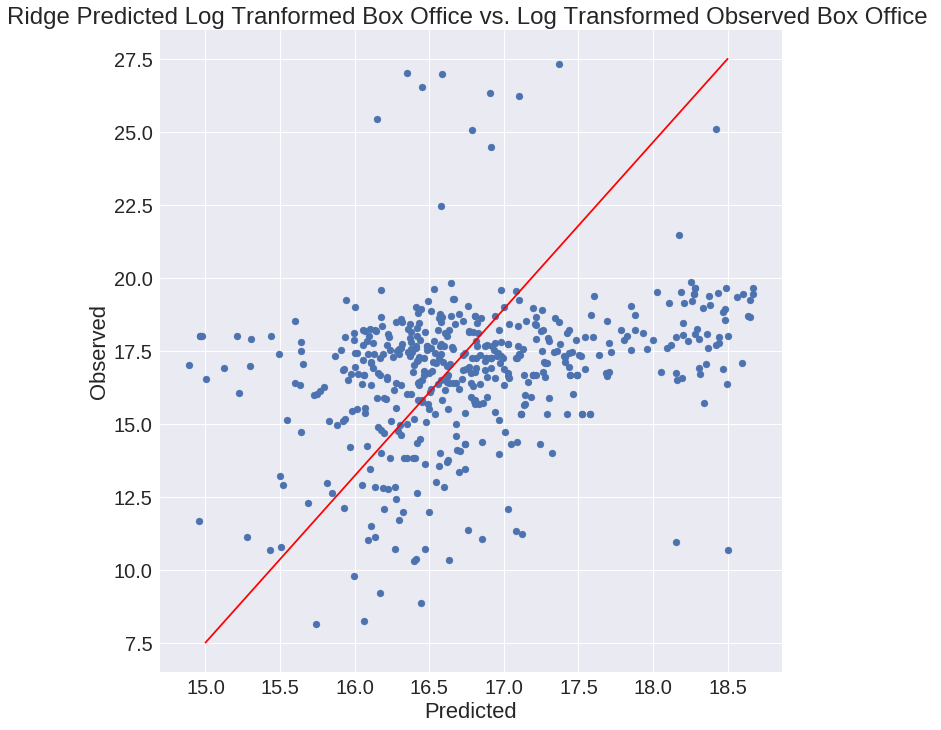

In [8]:
# plt.set(font_scale=2)
plt.figure(figsize=(10,10))
plt.scatter(ridge_predict, y)
plt.plot( [15,18.5],[7.5,27.5], c='r' )
plt.tight_layout()
plt.ylabel('Observed')
plt.xlabel('Predicted')
plt.title('Ridge Predicted Log Tranformed Box Office vs. Log Transformed Observed Box Office ')
plt.show()

plt.savefig('Ridge_predictions.png', bbox_inches='tight')

#df = sns.load_dataset('iris')
#sns_plot = sns.pairplot(df, hue='species', size=2.5)
#sns_plot.savefig("output.png")

## RidgeCV()

In [160]:
# rcv = RidgeCV(cv=10, alphas=[10e-7, 10e-6, 10e-5, 10e-4, 10e-3, 10e-2, 10e-1], scoring='r2')
# rcv.fit(X, y)

RidgeCV(alphas=[1e-06, 1e-05, 0.0001, 0.001, 0.01, 0.1, 1.0], cv=10,
    fit_intercept=True, gcv_mode=None, normalize=False, scoring='r2',
    store_cv_values=False)

In [161]:
# rcv.score(X, y)

0.12725227432300368

In [151]:
# rcv.alpha_

1.0

## L2 Regularization Cross Validation (scratch)

In [195]:
X[]

,stars,reviews,years,big_publishing,release,wait,tags
404,3.2,21.0,1998.0,0,2008.0,10.0,2
499,4.1,23.0,2002.0,0,2011.0,9.0,4
371,4.6,9.0,2002.0,0,2010.0,8.0,4
491,3.6,46.0,1996.0,1,2013.0,17.0,6
303,3.7,39.0,2000.0,0,2009.0,9.0,6
475,4.2,27.0,2001.0,0,2005.0,4.0,5
498,4.1,167.0,1996.0,1,2006.0,10.0,1
466,4.0,47.0,1979.0,1,1985.0,6.0,9
360,3.4,63.0,1994.0,0,2014.0,20.0,5
98,4.1,11.0,2002.0,1,1967.0,-35.0,9


In [196]:
y=df_woo['box_office_log']
X=df_woo.drop(['box_office_log','box_office', 'bs_rank', 'PRH_dummy', 
               'H_Books_dummy', 'SS_dummy', 'HC_dummy', 'Mac_dummy'],1)
norm_X = preprocessing.normalize(X)

In [197]:
for alpha in alphas:
    scores = []
    ridge = Ridge(alpha)
    for k in range(0,12):
        
        y_train = y[[a != k for a in tags]]
        x_train = norm_X[[a != k for a in tags]]


        y_test = y[[a == k for a in tags]]
        x_test = norm_X[[a == k for a in tags]]
        
        ridge.fit(x_train, y_train)
        score = ridge.score(x_test, y_test)
        scores.append(score)
        
        print("R2 for fold is: %s" % score)
        mean_score = np.mean(scores)/12

    print('alpha = ', alpha, 'score = ', mean_score)

R2 for fold is: 0.0236362383301
R2 for fold is: 0.14554817378
R2 for fold is: 0.0745015060833
R2 for fold is: 0.00639818989771
R2 for fold is: -0.169271789054
R2 for fold is: -0.00475725783214
R2 for fold is: 0.182025486102
R2 for fold is: 0.107824156629
R2 for fold is: 0.0309668849999
R2 for fold is: -0.0523537286634
R2 for fold is: 0.120891580473
R2 for fold is: 0.0346978816221
alpha =  1e-07 score =  0.00347296751645
R2 for fold is: 0.0261786796458
R2 for fold is: 0.14700233592
R2 for fold is: 0.0731145563823
R2 for fold is: 0.00195378707162
R2 for fold is: -0.163655771599
R2 for fold is: -0.00270103637857
R2 for fold is: 0.177058025481
R2 for fold is: 0.103438591095
R2 for fold is: 0.0295549492624
R2 for fold is: -0.0541517470142
R2 for fold is: 0.130280839526
R2 for fold is: 0.0420239466107
alpha =  1e-06 score =  0.00354234136113
R2 for fold is: 0.0367781716562
R2 for fold is: 0.149845480283
R2 for fold is: 0.0652147023299
R2 for fold is: -0.0214191079945
R2 for fold is: -0.14321

## Residuals: Ridge

In [264]:
Residuals = pd.DataFrame()
Residuals['log_observed'] = y
Residuals['predicted'] = ridge_predict

In [265]:
Residuals['residuals'] = Residuals['log_observed'] - Residuals['predicted']

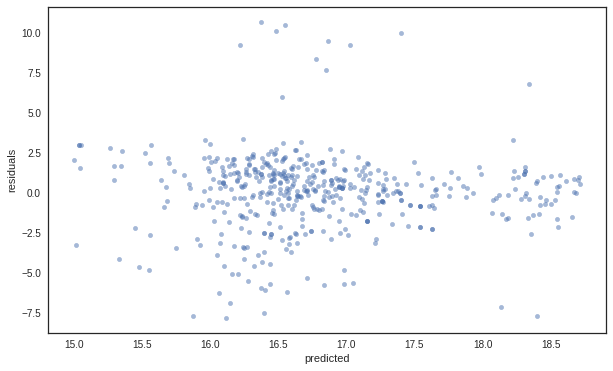

In [267]:
with sns.axes_style('white'):
    plot=Residuals.plot(kind='scatter',
                  x='predicted',y='residuals',alpha=0.5,figsize=(10,6))

# Lasso L1 Regularization 

In [ ]:
# alphas=[1e-7, 1e-6, 1e-5, 1e-4, 1e-3, 1e-2, 1e-1, 1.0]

In [281]:
for alpha in alphas:
    lasso = Lasso(alpha)
    
    lasso_score = cross_val_score(lasso, norm_X, y, cv=6, scoring='r2')

    print('alpha = ', alpha, 'score = ', lasso_score.mean())
#best lasso alpha =  1e-06 score =  0.0719678630831
#ridge was better

alpha =  1e-07 score =  0.0719578955239
alpha =  1e-06 score =  0.0719678630831
alpha =  1e-05 score =  0.0712861710392
alpha =  0.0001 score =  0.0684163087782
alpha =  0.001 score =  0.0642260490821
alpha =  0.01 score =  0.0508648567015
alpha =  0.1 score =  0.0334970776007
alpha =  1.0 score =  -0.010708493521


In [282]:
lasso_predict = cross_val_predict(Lasso(1e-07), norm_X, y, cv=6)
lasso_predict

array([ 18.2441246 ,  16.01124197,  16.50099911,  16.92980278,
        16.71686701,  16.2654416 ,  17.8494382 ,  16.64277245,
        17.33007686,  17.41155862,  16.50026988,  15.88862681,
        16.7868017 ,  17.22347727,  18.16772638,  16.153465  ,
        18.26876352,  16.22149057,  17.10412952,  16.58422342,
        17.37169281,  16.2595994 ,  16.43570465,  15.47085128,
        15.91988856,  16.98496344,  16.07263283,  16.96530642,
        14.8741829 ,  17.41155862,  18.27426063,  17.03943937,
        16.73231079,  17.64096706,  16.49049667,  17.10399742,
        16.50676342,  17.6118259 ,  16.27635038,  18.27278752,
        16.63759394,  17.23461642,  16.67857212,  17.75411375,
        15.90884123,  16.9767295 ,  16.78726359,  16.58460371,
        16.32261405,  18.27426063,  16.20120449,  16.15283333,
        16.29975093,  16.02310781,  16.51495918,  16.09453845,
        16.49487829,  16.01621549,  18.2218102 ,  17.27411711,
        15.76244584,  18.15992214,  14.83572722,  16.70

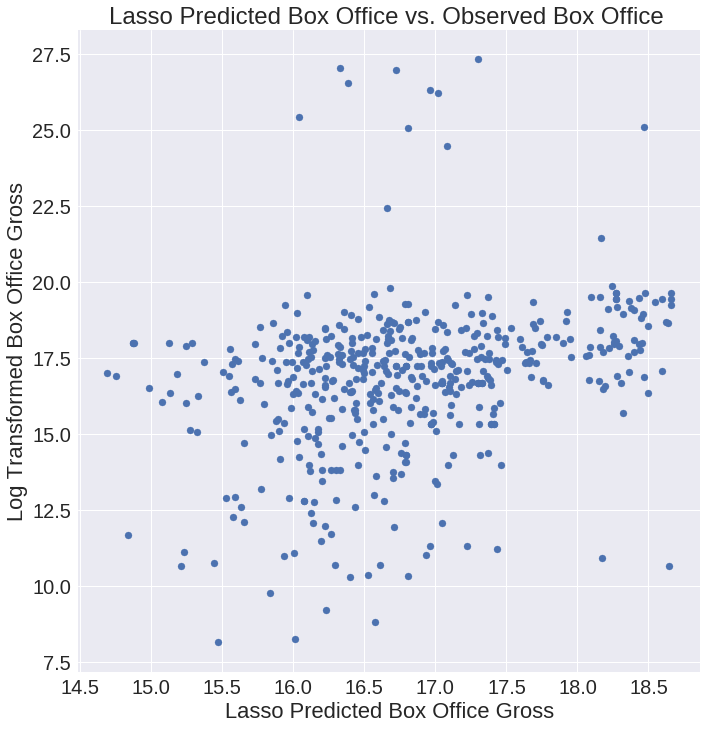

In [302]:
sns.set(font_scale=2)
plt.figure(figsize=(10,10))
plt.scatter(lasso_predict, y)
plt.tight_layout()
plt.ylabel('Log Transformed Box Office Gross')
plt.xlabel('Lasso Predicted Box Office Gross')
plt.title('Lasso Predicted Box Office vs. Observed Box Office ')
plt.show()

plt.savefig('Lasso_predictions.png', bbox_inches='tight')

# Next steps

In [262]:
df_woo.sample()

,box_office_log,box_office,stars,reviews,bs_rank,years,big_publishing,PRH_dummy,H_Books_dummy,SS_dummy,HC_dummy,Mac_dummy,release,wait
77,19.136396,204565000.0,4.6,675.0,638.0,1994.0,1,0,0,0,1,0,1973.0,-21.0


In [263]:
df_woo.describe()
# data shows skew towards more recent books. 


,box_office_log,box_office,stars,reviews,bs_rank,years,big_publishing,PRH_dummy,H_Books_dummy,SS_dummy,HC_dummy,Mac_dummy,release,wait
count,492.000000,4.920000e+02,492.000000,492.000000,4.920000e+02,492.000000,492.000000,492.000000,492.000000,492.000000,492.000000,492.000000,492.000000,492.000000
mean,16.800999,6.109611e+09,4.167683,2584.886179,3.419589e+04,1997.609756,0.394309,0.152439,0.063008,0.065041,0.058943,0.054878,2002.184959,4.575203
std,2.519094,5.299773e+10,0.406856,8737.866792,1.241090e+05,10.428407,0.489199,0.359812,0.243225,0.246849,0.235758,0.227974,10.816576,11.200289
min,8.154213,3.478000e+03,2.800000,1.000000,2.000000e+00,1959.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1959.000000,-49.000000
25%,15.828806,7.487970e+06,3.900000,55.750000,9.617500e+02,1993.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1998.000000,1.000000
50%,17.139152,2.776142e+07,4.200000,292.500000,3.450000e+03,2000.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2005.000000,4.000000
75%,18.009440,6.628274e+07,4.500000,831.250000,1.888800e+04,2005.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2010.000000,8.000000
max,27.339331,7.470000e+11,5.000000,56789.000000,1.731222e+06,2016.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2017.000000,40.000000
